# Introduction to Propagation of Errors

### Goals:

1. To understand what we mean by "propogation of errors" and why it is important.
2. To understand the equations governing propogation of errors.
3. To apply those equations to a simple example, wherein we devise a really poor method of measuring the area of a table.

### Timing

1. Try to finish this notebook in 30-35 minutes

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1s0Zv_kr7vmFp90v8mqcsQXw4wKxGXOViK-VJ_cjVTGk/edit?usp=sharing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Some functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.normal   | generates a random real number for a "Gaussian" or "Normal" distribution |


### Scientific Context

Recall this figure illustrating Hubble's Law:

<img src="figures/hubble_constant_far.jpg" width="40%"/>

Many of you noted that the error bars where shown on the x-axis (i.e., the distance) rather than the y-axis (i.e., the velocity).

The reason for that is that it is harder to measure the distance to faraway galaxies than it is to measure the velocity at which they are moving.  Later in the course we will do a notebook where we will measure the Doppler shifts used to measure the velocities of distance galaxies, and you will see that we can be quite accurate.

For distances, we have to use what is called the "distance ladder" wherein we measure the distance to nearby objects, then use those to calibrate to more distant objects.  

### How not to measure the area of your desk or table.

By way of analogy to one of the techniques used to measure the Hubble constant, let's measure the area of the desk or table that you are working at in a really complicated and inaccurate fashion.  Let's assume you have a rectangular table like I do.

1. Take a card from your wallet or bag, maybe an ID card, or a business card, or a debit card or whatever.
2. Estimate the length of the card, in centimeters.  Let's call that $C$.  E.g., for me, I'm using a debit card from my wallet and I estimate $C \sim 8 {\rm cm}$.
3. Find a book, something that is a few times longer than the card.  Now measure the length of the book using the card.  Let's call that $B$.  E.g., for me, i'm using a Moleskine notebook that was sitting on my desk and I measured $B \sim 2.5$ cards.
4. Now measure the length and width of the table, using the book. Let's call these $l$ and $w.$  For me, I measure $w \sim 5.1$ and $l \sim 3.8$ books.
5. Now we do the math and estimate the area of the desk. 

The width of the desk in cm is $(w * B * C)$, the length in cm is  $(l * B * C)$, so the area is

$A = (w * B * C)(l * B * C)$ 

$A = w * l * B^2 * C^2$


### Input your own measurments into the next cell.

We are using the '_m' to indicate that these are the actual measurements. 

In [2]:
C_m = 8.5
B_m = 3.85
l_m = 3.3
w_m = 2.05
A_m = w_m * l_m * B_m**2 * C_m**2
print(f"Area of desk: {A_m:0.2f} cm^2")

Area of desk: 7244.81 cm^2


In [3]:
# let's write a function to do that computation:
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2

# And check to make sure it works.
print(deskArea(w_m, l_m, B_m, C_m), A_m)
assert np.isclose(deskArea(w_m, l_m, B_m, C_m), A_m)

7244.811853124999 7244.811853124999


In [ ]:
# now lets play around a bit and see how 
# how much the area would change if we got one of those measurements wrong

In [9]:
print(f"If C = C + 0.8: A = {deskArea(w_m, l_m, B_m, C_m+0.8):0.2f} cm^2")
print(f"If l = 1.1 * l: A = {deskArea(w_m, l_m*1.1, B_m, C_m):0.2f} cm^2")

If C = C + 0.8: A = 8672.72 cm^2
If l = 1.1 * l: A = 7969.29 cm^2


In [5]:
# Let's divide out the orginal area of the test to see by what fraction our estimate changed

print(f"If C = C + 0.8: A = {(deskArea(w_m, l_m, B_m, C_m+0.8)/A_m):0.2f} * A_m")
print(f"If l = 1.1 * l: A = {(deskArea(w_m, l_m*1.1, B_m, C_m)/A_m):0.2f} * A_m")

If C = C + 0.8: A = 1.20 * A_m
If l = 1.1 * l: A = 1.10 * A_m


### Exercise:

#### E.1 Measure the area of your desk, and compute how much your estimate would change in both absolute and relative terms if:

#### a. You had C_m wrong by 1 cm.

#### b. If you had w_m wrong by 10\%.

#### Paste your work (including your values of l_m, w_m, B_m, C_m into the google doc template.

### We are actually just re-inventing calculus.

What we are doing is estimating how much the value of a function changes when we change one of the input parameters.  

That is exactly what a partial derivative is.

For example, if we wanted to compute how much $A$ changes if we changed our estimate of $l$, we would get

$\Delta A_{l} = \frac{\partial A}{\partial l} * \delta l$

Where $\delta l$ is the change in our estimate of $l$, $\Delta A_{l}$ is the change in A resulting from the change in $l$ and $\frac{\partial A}{\partial l}$ is the partial derivative of $A$ with respect to $l$.

Now here is an interesting point: when we compute the partial derivative of $A$ with respect to $l$, it just pulls a factor of $l$ out.

$\frac{\partial A}{\partial l} = w B^2 C^2$

So, if compute the relative change in $A$ we see that a lot of things cancel out:

$\frac{\Delta A_{l}}{A} = \frac{w B^2 C^2 \delta l}{w l B^2 C^2} = \frac{\delta l}{l}$

**This is really not at all a suprising result.  All it is saying is that if your measurement of the length of the desk in terms of books were 10\% higher, then your calculcation of the area of the desk would also be 10\% higher.** 

That is a pretty intuitive result by itself.  What we are going to do next is learn how to account for more complicated cases.

### A complication.

In the example above, we don't actually know what $\delta l$ (or $\delta w$, $\delta C$ and $\delta B$) are.  They
represent uncertainties.  

What we can do is to pretend that, for example, $l \pm \delta l$ represents a great many possible measurement of $l$ that are consistent with what we actually measured and see what the distribution of values of $A$ looks like.

We are going to use capital $\Delta$, e.g., $\Delta l$ and $\Delta A$ to refer to the changes with respect to the original that we see in specific trials, and lowercase $\delta$, e.g., $\delta l$ and $\delta A$ to refer to the uncertainties we assign to quantities.  

So, we use $l \pm \delta l$ to define a distribution of values of $l_{\rm sim}$ which we then use to compute $\Delta l = l_{\rm sim} - l_{m}$.  

#### Simulating a bunch of measurements of l

We are going to be simulating 10000 measurements, drawn from a normal distribution centered at $l_m$ and with a width of $0.1*l_m$.  

This corresponds to an uncertainty of 10% on the measurement of $l$, i.e., $\delta l = 0.10$.

In [10]:
rng = np.random.default_rng(42)

In [11]:
# This function will simulate 10000 measurements drawn from a Normal distribution 
# The distribtuion is centered at l_m and has standard deviation of 0.1*l_m
l_sim = rng.normal(loc=l_m, scale=0.1*l_m, size=10000)

#### Then we plot them

First as distribution of the simulated values (in the next cell).

Then as a distribution of the relative change with respect to the orginal or central value (two cells down). 

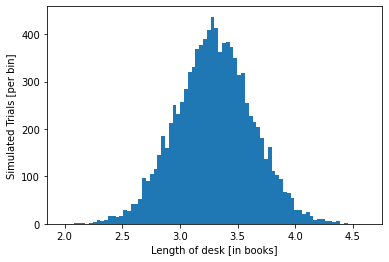

In [12]:
plt.hist(l_sim, bins=np.linspace(0.6*l_m, 1.4*l_m, 81))
plt.xlabel("Length of desk [in books]")
plt.ylabel("Simulated Trials [per bin]")
plt.show()

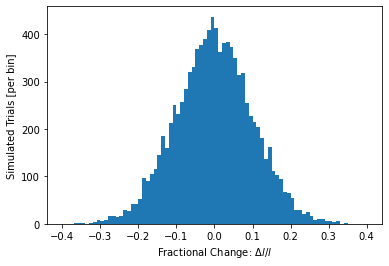

Fractional Change: -0.00 ± 0.10


In [13]:
plt.hist((l_sim/l_m)-1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'Fractional Change: $\Delta l / l$')
plt.ylabel("Simulated Trials [per bin]")
plt.show()

print(f"Fractional Change: {np.mean((l_sim/l_m)-1):0.2f} ± {np.std((l_sim/l_m)-1):0.2f}") 

# Effect on Area measurement

Now we are going to compute the distribution of measurements of the area $A$ we would get from those measurements of $l$.

Pro-tip: even though w_m, B_m and C_m are simple numbers and l_sim is actually an array of 10000 numbers, numpy is smart enough to know that it should compute 10000 values for A_sim_1 and dA_over_A_sim_1 when we multiple the two quantities together.

### Case 1, effect of uncertainty on l

Here we are just using the l_sim values we plotted above to simulate what would happen if we measured different values of l.  (I.e., the length of the desk as measured in books).

Note that the width of the distribution of the relative change in the value of A is 0.10 or 10%

In [14]:
# Here we are going to compute the resulting relative change in A
A_sim_1 = deskArea(w_m, l_sim, B_m, C_m)
dA_over_A_sim_1 = (A_sim_1 - A_m)/A_m

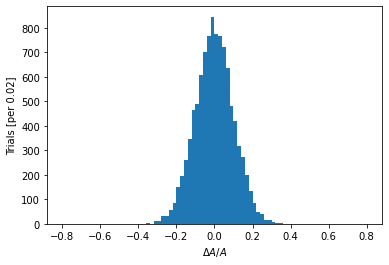

Fractional Change: -0.00 ± 0.10


In [15]:
plt.hist(dA_over_A_sim_1, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_1):0.2f} ± {np.std(dA_over_A_sim_1):0.2f}")

### Case 2, effect of uncertainty on C

In this case we are going to simulate what happens if we had used a different value of C, the length of the card we used to measure the book.

When we do this we find that the width of the distribution of the relative change in the value of A is 0.20 or 20%

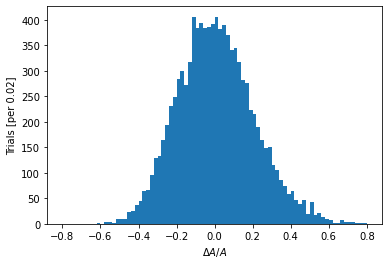

Fractional Change: 0.01 ± 0.20


In [16]:
C_sim = np.random.normal(loc=C_m, scale=0.1*C_m, size=10000)
A_sim_2 = deskArea(w_m, l_m, B_m, C_sim)
dA_over_A_sim_2 = (A_sim_2 - A_m)/A_m

plt.hist(dA_over_A_sim_2, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_2):0.2f} ± {np.std(dA_over_A_sim_2):0.2f}")

### Case 3, effect of combined uncertainty on l and w

In this case we are going to simulate what happens if we had found different values of both l and w, ie., the length and width of the desk, as measured in books.

When we do this we find that the width of the distribution of the relative change in the value of A is 0.14 or 14%

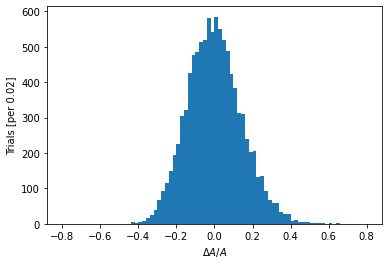

Fractional Change: 0.00 ± 0.14


In [17]:
w_sim = rng.normal(loc=w_m, scale=0.1*w_m, size=10000)
A_sim_3 = deskArea(w_sim, l_sim, B_m, C_m)
dA_over_A_sim_3 = (A_sim_3 - A_m)/A_m

plt.hist(dA_over_A_sim_3, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.show()

print(f"Fractional Change: {np.mean(dA_over_A_sim_3):0.2f} ± {np.std(dA_over_A_sim_3):0.2f}")

### Mathematical formulas

(These formulae and their derivations can be found in the Hughes and Hase text.  Note however that they use slightly different notation, mainly using $\alpha$ where we use $\delta$.)

If the notation is confusing you, or you are uncomfortable with the calculus, don't worry.  We will also be exploring these results visually.

For now, and for the next couple weeks we are going to assume that the variables we are measuring all independent of each other.  I.e., our measurement of $w$ did not somehow depend on $l$.  For this particular example, that is almost certainly true.

For those of you comfortable with partial derivatives and summation, the formula for propagation of errors given a set of measurements of **_independent_** quantities $x_i$ with uncertainties $\delta_i$ that can be used to compute a quantity $f(x_i)$ is:

$\sigma_f^{2}(\bf{x}) = \sum_i \left(\frac{\partial f}{\partial x_i} \delta_i\right)^2$ 

Where:

$\sigma_f^2(\bf{x})$ is the variance (i.e., the square of the standard deviation) of distibution of the $f$, the quantity that we are trying to compute. 

And you should evaluate the partial derivatives of $f$ at the central value of $f$. 

**You might also note that this looks sort of like an extension of measuring distances when you move in multiple axes on a grid.  The sum to the total distance you move is the sum of the squares of the distance you move along each grid dimension.**


In our case, $f = A$ is the area of the desk, and the $x_i$ are the things we measured, namely: $w, l, B, C$.  

Note again that you should evaluate the partial derivatives of $f$ (i.e. $A$) at the central value of $f$ (i.e. the central value of $A$).

In our case, this means that 

$\sigma_A^2 = \left(\frac{\partial A}{\partial l} \delta l\right)^2 + \left(\frac{\partial A}{\partial w} \delta w\right)^2 + \left(\frac{\partial A}{\partial B} \delta B\right)^2 + \left(\frac{\partial A}{\partial C} \delta C\right)^2$

**This equation is the main reason that variances are so useful: it says that if you believe that your input measurements are scattered around the true values according to their uncertainties, you have a straightforward formula for the variance of the quanity that you care about, that the square root of the variance on that quantity will tell you how much scatter to expect to see if you performed the measurement many times.  _In short, that can serve as a very good estimate on the uncertainty of the quantity you care about_.**

Recall that in our case $A = w l B^2 C^2$.

Taking the partial derivatives and dividing by $A$ gives four terms in the equation are that are going to get squared, which are:

$\frac{1}{A}\frac{\partial A}{\partial l} \delta l = \delta l \frac{w B^2 C^2}{l w B^2 C^2} = \frac{\delta l}{l}$

$\frac{1}{A}\frac{\partial A}{\partial w} \delta w = \delta w \frac{w l B^2 C^2}{l w B^2 C^2} = \frac{\delta w}{w}$

$\frac{1}{A}\frac{\partial A}{\partial B} \delta B = \delta B \frac{2 l w B C^2}{l w B^2 C^2} = \frac{2 \delta B}{B}$

$\frac{1}{A}\frac{\partial A}{\partial C} \delta C = \delta C \frac{2 l w B^2 C}{l w B^2 C^2} = \frac{2 \delta C}{C}$


Putting it all together gives us this:

$\left(\frac{\sigma_A}{A}\right)^2 = \left(\frac{\delta l}{l}\right)^2 + \left(\frac{\delta w}{w}\right)^2 + \left(2 \frac{\delta B}{B}\right)^2 + \left(2 \frac{\delta C}{C}\right)^2$

$\frac{\delta A}{A} = \frac{\sigma_A}{A} = \left(\left(\frac{\delta l}{l}\right)^2 + \left(\frac{\delta w}{w}\right)^2 + \left(2 \frac{\delta B}{B}\right)^2 + \left(2 \frac{\delta C}{C}\right)^2\right)^{1/2}$ 

### Synopsis of the formulas.

If you got lost in the math above, try to make sure that you understand this synposis of the key points.

The last formula tells us that in this case we can obtain an estimate of the relative uncertainty $\frac{\delta A}{A}$ by taking the square root of quantities related to the relative errors of each of the input measurments. 

Adding the squares of quantities and then taking the square root of the sum is often referred to as "adding in quadrature".

What we have just discovered are two extremely useful rules for error propgation:

1. If a quantity is the product (i.e., multiplication) of a bunch of measurements, you can add the relative errors of those measurements in quadrature to estimate the relative uncertainty on the quantity of interest.

2. If a quantity depends on a measurement to some power, then you should multiply the relative contribution for that term by that power.  Pro-tip: note that division is that same as multiplying by a quantity raised to the $-1$ power.  

There is a extremely useful third rule, which we actually saw in an earlier notebook, but didn't comment on:

3. If a quantity is the sum (i.e., addition) of a bunch of measurements, you can add the absolute errors (rather than the relative errors) of those measurements in quadrature to estimate the absolute uncertainty on the quantity of interest.

**These three rules are all you need to do error propagation in many, many cases.**



### Question for discussion.

#### 1.1 Connect the three figures we made above (cases 1, 2 and 3) to the formula for propagation of errors given just above.  Explain what corresponds to what, and if the numerical results that we got match the formula.  Also explain the difference in the outcomes in the three cases in simple English.

There is a lot going on here.  So you should provide a lot of details.


#### 1.2 In your own words, explain how we used random numbers to study the propagation of errors.   Explain if you think this is a good or bad technique.  


# Example use case, computing the power output of a distant light source

In astronomy and astrophysics, we can write down a formula for the "energy flux" i.e., the amount of energy captured in our detector in a given area in a given time, from a distance light source (i.e., a star or galaxy or other astronomical source):

$F_{\rm E} = \frac{\hat{E}_{\gamma}*n_{\gamma}}{A*\eta*t}$ 

Where: 

$F_{\rm E}$ is the "energy flux"

$n_{\gamma}$ is the number of photons we detected

$\hat{E}_{\gamma}$ is the average photon energy

$A$ is the area of the detector (assuming that it is pointed at the source).

$\eta$ is the total efficiency of the detector (this includes accounting for things like some of the light being absorbed or reflected in the atmosphere).

$t$ is the exposure or observation time, i.e., how long we pointed at the source.

The units of energy flux are $J m^{-2} s^{-1}$, i.e., Energy per unit area, per unit time.


The total power from the astrophysics source is the total energy per second crossing the surface of a sphere centered on the source.  


$P = 4 * pi * d^2 * F_{\rm E} = 4 * pi * d^2 \frac{\hat{E}_{\gamma}*n_{\gamma}}{A*\eta*t}$

The units of power are $\frac{J}{s} = W$

### Exercises.

#### Compute the relative uncertainty on the energy flux and the total power output by a source for two different observations.  Show your work!

#### E.2  Observing the sun with a simple photo-detector.  In this case let's assume that:

1. The uncertainty on the $n_{\gamma}$ is about 2\%, this estimate might come from making repeated measurements and studying the variation, i.e., $\frac{\delta n_{\gamma}}{n_{\gamma}} = 0.02$,
2. The uncertainty on $\hat{E}_{\gamma}$ is 3\%, i.e., $\frac{\delta \hat{E}_{\gamma}}{\hat{E}_{\gamma}} = 0.03$, this number might come from seperate measurement of the spectrum of sunlight.
3. The area of the photodetector is very well known, and it's uncertainty can be ignored.
4. The efficiency of the photodetector is only known to about 2\%.  This number probably came from calibrating the photodetector with light of well-known brightness.
5. The observation time is very well known.
6. The distance to the sun is very well known.


#### E.3 Observing the distant Gamma-ray pulsar Vela with a space-based telescope that is sensitive to gamma-rays. In this case let's assume:

1. The uncertainty on the $n_{\gamma}$ is about 3\%.
2. The uncertainty on $\hat{E}_{\gamma}$ is 5\%.
3. The area of the telescope is very well known, and it's uncertainty can be ignored.
4. The efficiency of the telescope is only known to about 5\%. 
5. The observation time is very well known.  
6. The distance to Vela is only known to 20%.

(Special note, while the sun emits light equally in all directions, we know that Vela does not, so using this equation for the power is wrong, but let's just ignore that for now.)


### Question

#### 2.1 Describe the results you got in the exercise in simple English.  Are the total relative uncertainties about what you expect?   Do these results suggest anything about when we might be able to ignore certain things when doing propagation of errors?   Again, please answer at some length and with details.


### General recipe

Above we saw three simple rules that we can use to do propagation of error in a lot of cases.

But the general recipe for doing propagation of error is:

1. Write down the quantity you care about in terms of the things you measured, i.e., $f = f(x_0, x_1, x_2 ...)$ where the $x_i$ are the things you measured.

2. Write down estimates for the uncertainties of the things you measured.   How you do this depends on how you measured things.  You might assign uncertainties somewhat arbitrarily (i.e., "we probably measured that to about 5% accuracy"), or you might design a systematic way to estimate the uncertainties.  (i.e., "we performed similar measurements on a control sample and obtained a standard deviation of about 5% of the measured value").  But in either case assigning the uncertainties is up to the person who did the measurements and should be described and justified in some detail.

3. Compute the partial derivatives of $f$ with respect to each of the $x_i$:  $\frac{\partial f}{\partial x_i}$.

4. Put it all together by summing in quadrature.

     $\sigma_f^{2}(\bf{x}) = \sum_i \left(\frac{\partial f}{\partial x_i} \delta_i\right)^2$ 